# MLP sign MNIST dataset

In [1]:
%%capture
#Imports
%pip install keras
%pip install tensorflow
%pip install kaggle
%pip install distutils

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from typing import List
from tqdm import tqdm
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

## Task 1: Acquire the data

In [5]:
train_df=pd.read_csv('/Users/mayaarvanitis/Desktop/winter2024/COMP551/archive/sign_mnist_train/sign_mnist_train.csv')
test_df=pd.read_csv('/Users/mayaarvanitis/Desktop/winter2024/COMP551/archive/sign_mnist_test/sign_mnist_test.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

#Normalize Features
#Drop the labels
X_train = train_df.drop('label', axis=1).values / 255.0
X_test = test_df.drop('label', axis=1).values / 255.0
y_train = LabelBinarizer().fit_transform(train_df['label'])
y_test = LabelBinarizer().fit_transform(test_df['label'])

#### Data Visualization

Text(0.5, 1.0, 'label: 13  letter: M')

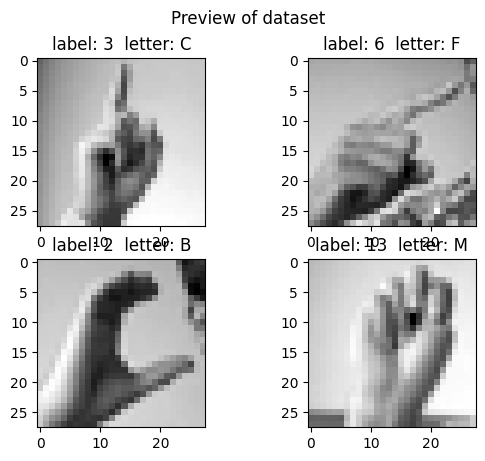

In [10]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [11]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))

Shape of X_train: (27455, 784)
Shape of y_train: (27455, 24)
Shape of X_test: (7172, 784)
Shape of y_test: (7172, 24)


## Task 2: Implement an MLP to classify image data

In [12]:
# Class for all activation functions
class ActivationFunction:
    # Static method for the ReLU (Rectified Linear Unit) activation function.
    # ReLU is defined as the positive part of its input.
    # Input: A numpy array 'x'.
    # Output: A numpy array where each element is the max between 0 and the corresponding element in 'x'.
    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    # Static method for the derivative of the ReLU function.
    # This is used in backpropagation during neural network training.
    # Input: A numpy array 'x'.
    # Output: A numpy array where each element is 1 if the corresponding element in 'x' is greater than 0, otherwise 0.
    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)

    # Static method for the softmax function.
    # Softmax is often used in the output layer of a neural network for multi-class classification.
    # It converts the input array into a probability distribution.
    # Input: A 2D numpy array 'x'. Each row represents a set of logits for a single sample.
    # Output: A 2D numpy array where each row sums to 1 and represents the probability distribution for the corresponding sample.
    @staticmethod
    def softmax(x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))  # subtract max for numerical stability
        return exps / np.sum(exps, axis=1, keepdims=True)

    # Static method for the sigmoid function.
    # Sigmoid is often used in the output layer of a binary classification neural network.
    # It converts the input into a value between 0 and 1.
    # Input: A numpy array 'x'.
    # Output: A numpy array where each element is the sigmoid of the corresponding element in 'x'.
    @staticmethod
    def sigmoid(x):
      clipped_x = np.clip(x, -500, 500)  # clip input to prevent overflow in the exponential function
      return 1 / (1 + np.exp(-clipped_x))

    # Static method for the Leaky ReLU activation function.
    # Leaky ReLU allows a small, non-zero gradient when the input is negative.
    # Input: A numpy array 'x' and an optional slope parameter 'alpha' for negative inputs.
    # Output: A numpy array where each element is either the corresponding element in 'x' (if positive) or 'alpha' times that element (if negative).
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)


In [13]:
# Class definition for a Multi-Layer Perceptron (MLP) neural network.
class MLP:

    # Constructor for the MLP class.
    # Inputs:
    # - layer_sizes: A list of integers representing the sizes of each layer in the network.
    # - learning_rate: A float representing the learning rate for gradient descent.
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        # Initialize weights with random values scaled by the square root of 2 divided by the size of the previous layer.
        self.weights = [np.random.randn(prev_layer, next_layer) * np.sqrt(2. / prev_layer)
                        for prev_layer, next_layer in zip(layer_sizes[:-1], layer_sizes[1:])]
        # Initialize biases as zero vectors.
        self.biases = [np.zeros((1, next_layer)) for next_layer in layer_sizes[1:]]

    # Method for forward propagation.
    # Inputs:
    # - X: A numpy array representing the input data.
    # - activation: A string specifying the activation function to use ('relu', 'sigmoid', or 'leakyrelu').
    # Outputs:
    # - activations: A list of numpy arrays representing the activations of each layer.
    # - zs: A list of numpy arrays representing the weighted sums before activation in each layer.
    def forward(self, X, activation='relu'):
        self.activations = [X]
        self.zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(self.activations[-1], w) + b
            self.zs.append(z)
            if activation == 'relu':
                activation_output = ActivationFunction.relu(z)
            elif activation == 'sigmoid':
                activation_output = ActivationFunction.sigmoid(z)
            elif activation == 'leakyrelu':
                activation_output = ActivationFunction.leaky_relu(z)
            else:
                raise ValueError("Activation function not supported.")
            self.activations.append(activation_output)

        # Apply softmax activation to the output layer.
        self.activations[-1] = ActivationFunction.softmax(self.zs[-1])
        return self.activations, self.zs

    # Method for backward propagation.
    # Inputs:
    # - X: A numpy array representing the input data.
    # - y: A numpy array representing the target labels.
    # - activations: A list of numpy arrays representing the activations of each layer.
    # - zs: A list of numpy arrays representing the weighted sums before activation in each layer.
    # Outputs:
    # - dW: A list of numpy arrays representing the gradients of the loss with respect to the weights.
    # - dB: A list of numpy arrays representing the gradients of the loss with respect to the biases.
    def backward(self, X, y, activations, zs):
      # Calculate the gradient of the loss with respect to the output layer's activations.
      delta = activations[-1] - y
      # Compute the gradient of the loss with respect to the last layer's weights.
      dW = [np.dot(activations[-2].T, delta)]
      # Compute the gradient of the loss with respect to the last layer's biases.
      dB = [np.sum(delta, axis=0)]

      # Iterate backwards through the layers to propagate the gradients.
      for l in range(2, len(self.weights) + 1):
          # Get the weighted sum before activation for the current layer.
          z = zs[-l]
          # Compute the derivative of the ReLU activation function for the current layer.
          sp = ActivationFunction.relu_derivative(z)
          # Update the delta by propagating it backwards and applying the derivative of the activation function.
          delta = np.dot(delta, self.weights[-l+1].T) * sp
          # Compute the gradient of the loss with respect to the current layer's weights.
          dW.insert(0, np.dot(activations[-l-1].T, delta))
          # Compute the gradient of the loss with respect to the current layer's biases.
          dB.insert(0, np.sum(delta, axis=0))

      return dW, dB

    # Method to update the weights and biases based on the gradients.
    # Inputs:
    # - dW: A list of numpy arrays representing the gradients of the loss with respect to the weights.
    # - dB: A list of numpy arrays representing the gradients of the loss with respect to the biases.
    def update_params(self, dW, dB):
        self.weights = [w - self.learning_rate * dw for w, dw in zip(self.weights, dW)]
        self.biases = [b - self.learning_rate * db for b, db in zip(self.biases, dB)]

    # Method to compute the loss using the cross-entropy function.
    # Inputs:
    # - y_true: A numpy array representing the true labels.
    # - y_pred: A numpy array representing the predicted probabilities.
    # Output: A float representing the loss value.
    def compute_loss(self, y_true, y_pred):
      m = y_true.shape[0]
      log_probs = np.log(np.clip(y_pred, a_min=1e-15, a_max=1))
      loss = -np.sum(y_true * log_probs) / m
      return loss

    # Method to predict the class labels for the input data.
    # Input: A numpy array representing the input data 'X'.
    # Output: A numpy array representing the predicted class labels.
    def predict(self, X):
        # Perform forward propagation to compute the activations of the network.
        activations, _ = self.forward(X)
        # Return the indices of the maximum values in the output layer (softmax probabilities),
        # which correspond to the predicted class labels.
        return np.argmax(activations[-1], axis=1)


    # Method to train the MLP model.
    # Inputs:
    # - X: A numpy array representing the input data.
    # - y: A numpy array representing the target labels.
    # - epochs: An integer representing the number of iterations to train the model.
    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            # Perform forward propagation to compute the activations and weighted sums.
            activations, zs = self.forward(X)
            # Compute the loss using the cross-entropy function.
            loss = self.compute_loss(y, activations[-1])
            # Perform backward propagation to compute the gradients of the loss with respect to weights and biases.
            dW, dB = self.backward(X, y, activations, zs)
            # Update the weights and biases using the gradients.
            self.update_params(dW, dB)

            # Print the loss every 10 epochs.
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    # Method to evaluate the accuracy of the MLP model.
    # Inputs:
    # - X: A numpy array representing the input data.
    # - y: A numpy array representing the true labels.
    # Output: A float representing the accuracy of the model.
    def evaluate_acc(self, X, y):
        # Use the predict method to get the predicted class labels.
        predictions = self.predict(X)
        # Calculate the accuracy by comparing the predicted labels with the true labels.
        accuracy = sum(predictions == y.argmax(axis=1)) / y.shape[0]
        return accuracy


In [14]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode y
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

print("Before encoding : ")
print(y_train.shape)
print(y_test.shape)

print("After encoding : ")
print(y_train_encoded.shape)
print(y_test_encoded.shape)

Before encoding : 
(27455, 24)
(7172, 24)
After encoding : 
(658920, 2)
(172128, 2)


In [ ]:
#set number of classes
num_classes = y_train.shape[1]

input_size = 784 # we have 784 pixels (Features)
output_classes = 24 # we have 24 labels

mlp_model = MLP(layer_sizes=[input_size, 128, 64, output_classes], learning_rate=0.01) #setting learning rate to 0.01 to begin

#Printing shapes for debugging purposes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_encoded.shape)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)


# Training Model ================================
mlp_model.fit(X_train, y_train_encoded, epochs=100)

# Evaluate the Model ================================
train_accuracy = mlp_model.evaluate_acc(X_train, y_train_encoded)
test_accuracy = mlp_model.evaluate_acc(X_test, y_test_encoded)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

X_train shape: (27455, 784)
y_train shape: (658920, 2)
Epoch 0, Loss: 3.5618
Epoch 10, Loss: 25.1409
Epoch 20, Loss: 27.9346
Epoch 30, Loss: 30.0873
Epoch 40, Loss: 30.8284
Epoch 50, Loss: 27.5836
Epoch 60, Loss: 28.9768


## Task 3: Running experiments
### Experiment 1: Three Different MLP Models
Three different models: (1) an MLP with no hidden layer, (2) an MLP with a single hidden layer having ReLU activations, (3) an MLP with 2 hidden layers having ReLU activations.

In [ ]:
three_mlps = [
    ([784, 24], 'No Hidden Layer'),
    ([784, 64, 24], 'Single Hidden Layer'),
    ([784, 128, 128, 24], 'Two Hidden Layers')
]

accuracies = []

for model, name in three_mlps:
    mlp = MLP(model, learning_rate = 0.001)
    #train the model
    mlp.fit(X_train, y_train_encoded, epochs=10)

    #evaluate on training set
    train_accuracy = mlp.evaluate_acc(X_train, y_train_encoded)

    #evaluate on test set
    test_accuracy = mlp.evaluate_acc(X_test, y_test_encoded)

    accuracies.append((name, train_accuracy, test_accuracy))

#print accuracies for each model
for name, train_accuracy, test_accuracy in accuracies:
    print(f"Model: {name}, Train Accuracy: {train_accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%")

Update the MLP class accordingly & then apply L2 regularization to the MLP with 2 hidden layers

In [ ]:
class MLP:
    def __init__(self, layer_sizes, learning_rate=0.01, reg_lambda=0.01): # add reg_lambda parameter for L2 regularization
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda # store regularization parameter
        self.weights = [np.random.randn(prev_layer, next_layer) * np.sqrt(2. / prev_layer)
                        for prev_layer, next_layer in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.zeros((1, next_layer)) for next_layer in layer_sizes[1:]]

    def forward(self, X, activation='relu'):
        self.activations = [X]
        self.zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(self.activations[-1], w) + b
            self.zs.append(z)
            if activation == 'relu':
                activation_output = ActivationFunction.relu(z)
            elif activation == 'sigmoid':
                activation_output = ActivationFunction.sigmoid(z)
            elif activation == 'leakyrelu':
                activation_output = ActivationFunction.leaky_relu(z)
            else:
                raise ValueError("Activation function not supported.")
            self.activations.append(activation_output)

        self.activations[-1] = ActivationFunction.softmax(self.zs[-1])
        return self.activations, self.zs

    def backward(self, X, y, activations, zs):
        delta = activations[-1] - y
        dW = [np.dot(activations[-2].T, delta)]
        dB = [np.sum(delta, axis=0)]

        for l in range(2, len(self.weights) + 1):
            z = zs[-l]
            sp = ActivationFunction.relu_derivative(z)
            delta = np.dot(delta, self.weights[-l+1].T) * sp
            dW.insert(0, np.dot(activations[-l-1].T, delta) + self.reg_lambda * self.weights[-l])  # Add L2 regularization term
            dB.insert(0, np.sum(delta, axis=0))

        return dW, dB

    def update_params(self, dW, dB):
        self.weights = [w - self.learning_rate * dw for w, dw in zip(self.weights, dW)]
        self.biases = [b - self.learning_rate * db for b, db in zip(self.biases, dB)]

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = np.log(np.clip(y_pred, a_min=1e-15, a_max=1))
        loss = -np.sum(y_true * log_probs) / m
        return loss

    def predict(self, X):
        activations, _ = self.forward(X)
        return np.argmax(activations[-1], axis=1)

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            activations, zs = self.forward(X)
            loss = self.compute_loss(y, activations[-1])
            dW, dB = self.backward(X, y, activations, zs)
            self.update_params(dW, dB)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def evaluate_acc(self, X, y):
        predictions = self.predict(X)
        accuracy = sum(predictions == y.argmax(axis=1)) / y.shape[0]
        return accuracy

In [ ]:
#define the model architecture and create the new MLP object
mlp_regularized = MLP(layer_sizes=[784, 128, 128, 24], learning_rate=0.01, reg_lambda=0.0001)

#train the MLP with L2 regularization
mlp_regularized.fit(X_train, y_train_encoded, epochs=300)

#evaluate the performance of the trained model on the test data
accuracy_L2reg = mlp_regularized.evaluate_acc(X_test, y_test_encoded)
print("Test Accuracy - Regularized Model with L2 regularization: {:.2f}%".format(accuracy_L2reg * 100))

#evaluate training accuracy
accuracy_L2reg_train = mlp_regularized.evaluate_acc(X_train, y_train_encoded)
print("Train Accuracy - Regularized Model with L2 regularization: {:.2f}%".format(accuracy_L2reg_train * 100))

### Convolutional Neural Network

In [ ]:
# normalizing and reshaping features
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0

# one-hot encoding labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_df['label'])
y_test = label_binarizer.transform(test_df['label'])

# defining image data generator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# defining the ConvNet architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(24, activation='softmax')
])